<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%205-%20Weight%20Initialization/Exp_5_Weight_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal,HeNormal
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
train_labels,test_labels=to_categorical(train_labels),to_categorical(test_labels)

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
def create_model(initializer,regularizer,dropout_rate=None):
    model=Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dense(256,activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dense(10,activation='softmax',kernel_initializer=initializer)
    ])
    if dropout_rate:
        model.add(Dropout(dropout_rate))

    model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')
    return model

In [4]:
xavier_model=create_model(GlorotNormal(),regularizers.l2(0.001))
kaiming_model=create_model(HeNormal(),regularizers.l2(0.001))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [5]:
xavier_history=xavier_model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))
kaiming_history=kaiming_model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 2.1051 - accuracy: 0.3251 - val_loss: 1.8254 - val_accuracy: 0.3764
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7903 - accuracy: 0.3874 - val_loss: 1.7500 - val_accuracy: 0.3969
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7322 - accuracy: 0.4075 - val_loss: 1.7916 - val_accuracy: 0.3924
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6972 - accuracy: 0.4244 - val_loss: 1.6727 - val_accuracy: 0.4320
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6804 - accuracy: 0.4296 - val_loss: 1.6665 - val_accuracy: 0.4359
Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2410 - accuracy: 0.3208 - val_loss: 1.8834 - val_accuracy: 0.3671
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8172 - accuracy: 0.3816 - val_loss: 1.7357 - val_ac

In [6]:
xavier_loss,xavier_accu=xavier_model.evaluate(test_images,test_labels)
print(f'accuracy:  {xavier_accu}')
print(f'loss:{xavier_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 1.6665 - accuracy: 0.4359
accuracy:  0.4359000027179718
loss:1.6664873361587524


In [7]:
kaiming_loss,kaiming_accu=kaiming_model.evaluate(test_images,test_labels)
print(f'accuracy:  {kaiming_accu}')
print(f'loss:{kaiming_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 1.7002 - accuracy: 0.4231
accuracy:  0.42309999465942383
loss:1.700179934501648


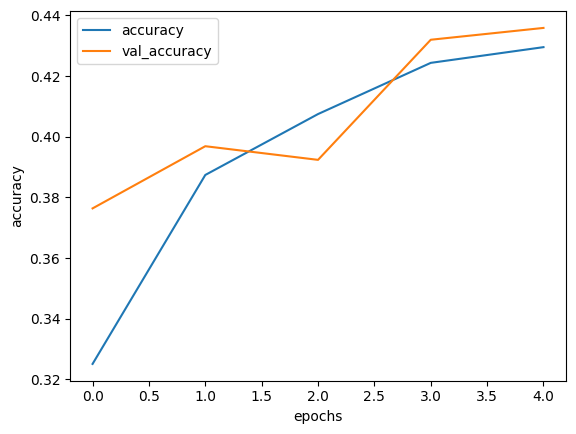

In [9]:

plt.plot(xavier_history.history['accuracy'],label='accuracy')
plt.plot(xavier_history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

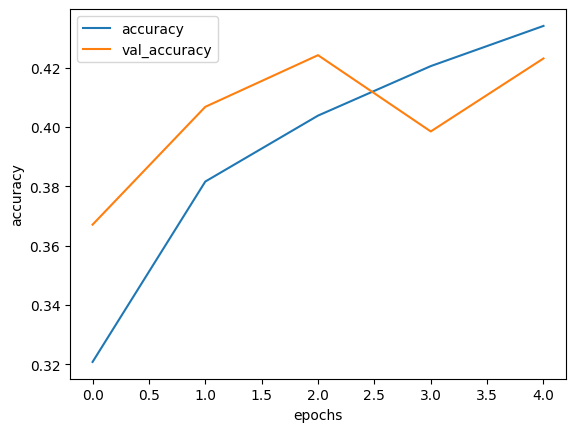

In [11]:
plt.plot(kaiming_history.history['accuracy'],label='accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()